# How to use Deep Learning algorithms in Python

In this example I will rely on Keras.
> Keras is an open-source neural-network library written in Python. <br>
[Keras.io](https://keras.io/) 

I reproduce the Example from [*Michael Grogan*](https://datascienceplus.com/keras-regression-based-neural-networks/)

A neural network consists of:
- **Input layers**: Layers that take inputs based on existing data
- **Hidden layers**: Layers that use backpropagation to optimise the weights of the input variables in order to improve the predictive power of the model
- **Output layers**: Output of predictions based on the data from the input and hidden layers


## The Example: predicting car price

This will be a regression-based neural network. For a given dataset the algorithm produces a *linear activiation function* <br>

The [**TensorFlow**](https://www.tensorflow.org) package is used to access Keras. Additionally we make use of the **scikit-learn**.

In [6]:
### Import Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor

### SetWD

import os;
path="C:/Users/fabia/Google Drive/UniBonn/Z_Python"
os.chdir(path)
os.getcwd()

'C:\\Users\\fabia\\Google Drive\\UniBonn\\Z_Python'

### Note: <br>neural networks need normalized variables/ data to interpret them properly

In [7]:
### normalized Variables

dataset=np.loadtxt("cars.csv", delimiter=",")
x=dataset[:,0:5]
y=dataset[:,5]
y=np.reshape(y, (-1,1))
scaler = MinMaxScaler()
print(scaler.fit(x))
print(scaler.fit(y))
xscale=scaler.transform(x)
yscale=scaler.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


### Note <br> neural network approach using two subsamples <br> - training sample <br>  - test sample

**Therefore we need to split the dataset into two subsamples**

In [8]:
### splitting dataset into subsamples

X_train, X_test, y_train, y_test = train_test_split(xscale, yscale)

### Configuration of Keras Model

In [9]:
### Set-up Neural Network API

model = Sequential()
model.add(Dense(12, input_dim=5, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

### run the Neural Network to learn from data
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

### producing Ouput by fitting the model
history = model.fit(X_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 12)                72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 185
Trainable params: 185
Non-trainable params: 0
_________________________________________________________________
Train on 577 samples, validate on 145 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/150
577/577 [==============================] - 0s 421us/sample - loss: 0.2445 - mean_squared_error: 0.2445 - mean_absolute_error: 0.3806 - val_loss: 0.2023 - val_mean_squared_error: 0.2023 - val_mean_absolute_error: 0.3496
Epoch 2/150
577/577 [==============================] - 0s 49us/sample - loss: 0.210

Epoch 32/150
577/577 [==============================] - 0s 45us/sample - loss: 0.0217 - mean_squared_error: 0.0217 - mean_absolute_error: 0.1174 - val_loss: 0.0217 - val_mean_squared_error: 0.0217 - val_mean_absolute_error: 0.1199
Epoch 33/150
577/577 [==============================] - 0s 48us/sample - loss: 0.0215 - mean_squared_error: 0.0215 - mean_absolute_error: 0.1174 - val_loss: 0.0216 - val_mean_squared_error: 0.0216 - val_mean_absolute_error: 0.1200
Epoch 34/150
577/577 [==============================] - 0s 55us/sample - loss: 0.0213 - mean_squared_error: 0.0213 - mean_absolute_error: 0.1167 - val_loss: 0.0215 - val_mean_squared_error: 0.0215 - val_mean_absolute_error: 0.1194
Epoch 35/150
577/577 [==============================] - 0s 48us/sample - loss: 0.0212 - mean_squared_error: 0.0212 - mean_absolute_error: 0.1157 - val_loss: 0.0214 - val_mean_squared_error: 0.0214 - val_mean_absolute_error: 0.1184
Epoch 36/150
577/577 [==============================] - 0s 50us/sample - los

577/577 [==============================] - 0s 50us/sample - loss: 0.0182 - mean_squared_error: 0.0182 - mean_absolute_error: 0.0986 - val_loss: 0.0208 - val_mean_squared_error: 0.0208 - val_mean_absolute_error: 0.1070
Epoch 68/150
577/577 [==============================] - 0s 48us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - mean_absolute_error: 0.0986 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_mean_absolute_error: 0.1067
Epoch 69/150
577/577 [==============================] - 0s 50us/sample - loss: 0.0181 - mean_squared_error: 0.0181 - mean_absolute_error: 0.0977 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_mean_absolute_error: 0.1054
Epoch 70/150
577/577 [==============================] - 0s 42us/sample - loss: 0.0180 - mean_squared_error: 0.0180 - mean_absolute_error: 0.0974 - val_loss: 0.0209 - val_mean_squared_error: 0.0209 - val_mean_absolute_error: 0.1068
Epoch 71/150
577/577 [==============================] - 0s 52us/sample - loss: 0.0181 - m

577/577 [==============================] - 0s 50us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - mean_absolute_error: 0.0945 - val_loss: 0.0206 - val_mean_squared_error: 0.0206 - val_mean_absolute_error: 0.1024
Epoch 103/150
577/577 [==============================] - 0s 52us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - mean_absolute_error: 0.0944 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_mean_absolute_error: 0.1028
Epoch 104/150
577/577 [==============================] - 0s 54us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - mean_absolute_error: 0.0953 - val_loss: 0.0207 - val_mean_squared_error: 0.0207 - val_mean_absolute_error: 0.1028
Epoch 105/150
577/577 [==============================] - 0s 50us/sample - loss: 0.0176 - mean_squared_error: 0.0176 - mean_absolute_error: 0.0948 - val_loss: 0.0205 - val_mean_squared_error: 0.0205 - val_mean_absolute_error: 0.1021
Epoch 106/150
577/577 [==============================] - 0s 47us/sample - loss: 0.0175

577/577 [==============================] - 0s 47us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - mean_absolute_error: 0.0930 - val_loss: 0.0203 - val_mean_squared_error: 0.0203 - val_mean_absolute_error: 0.1003
Epoch 138/150
577/577 [==============================] - 0s 49us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - mean_absolute_error: 0.0930 - val_loss: 0.0203 - val_mean_squared_error: 0.0203 - val_mean_absolute_error: 0.1002
Epoch 139/150
577/577 [==============================] - 0s 50us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - mean_absolute_error: 0.0934 - val_loss: 0.0204 - val_mean_squared_error: 0.0204 - val_mean_absolute_error: 0.1005
Epoch 140/150
577/577 [==============================] - 0s 43us/sample - loss: 0.0173 - mean_squared_error: 0.0173 - mean_absolute_error: 0.0928 - val_loss: 0.0202 - val_mean_squared_error: 0.0202 - val_mean_absolute_error: 0.0999
Epoch 141/150
577/577 [==============================] - 0s 47us/sample - loss: 0.0173

### Plotting the Results

dict_keys(['loss', 'mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_mean_squared_error', 'val_mean_absolute_error'])


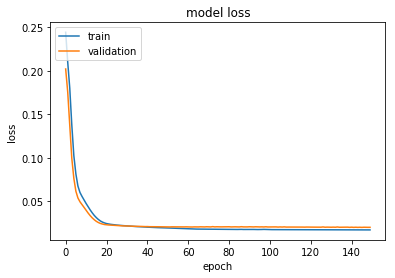

In [10]:
### standard plot using matplotlib

print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()